<a href="https://colab.research.google.com/github/NovaStrix/LogReg-Project/blob/main/LogReg_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTANT

This notebook is for learning purposes

The project is making a classification model which predicts the likeliness of someone adopting a program.

We will be using Logistic Regression with cleaned and feature-engineered data.

The end goal is to make a summary based on the provided format.

I will also put my findings into a [report](https://docs.google.com/presentation/d/1dXClGP3vrzPI_cswL9WswarFeUpZ9G7kNgCI-cvShsQ/edit?usp=sharing)

I also did a little bit of Simple Neural Network below just to compare.

Enjoy!

#Import Data

In [1]:
##Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
##Importing sales data
url = "https://drive.google.com/file/d/1AFI3jKDmsdqEEYf0Rv51SX7lcnnDpNU0/view?usp=drive_link"
output = "sales_date.pickle"
gdown.download(url, output, quiet=False, fuzzy=True)

##Importing campaign result data
url = "https://drive.google.com/file/d/1fqsyAe2aqAz76JRNPP9J81mlK8GqbfrL/view?usp=sharing"
output = "result.pickle"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1AFI3jKDmsdqEEYf0Rv51SX7lcnnDpNU0
To: /content/sales_date.pickle
100%|██████████| 1.82M/1.82M [00:00<00:00, 29.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fqsyAe2aqAz76JRNPP9J81mlK8GqbfrL
To: /content/result.pickle
100%|██████████| 594k/594k [00:00<00:00, 58.9MB/s]


'result.pickle'

In [3]:
##Turning data to df
sales = pd.read_pickle("sales_date.pickle")
result = pd.read_pickle("result.pickle")

#Data Cleaning

##Checking Sales Data

In [4]:
##Checking sales data
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  object 
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  int64  
 4   flag_female              16487 non-null  int64  
 5   avg_sales_L36M           15726 non-null  float64
 6   cnt_sales_L36M           16487 non-null  int64  
 7   avg_sales_L36M_promo     12679 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  int64  
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  int64  
 11  count_direct_promo_L12M  16487 non-null  int64  
 12  client_age               16487 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.8+ MB


,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age
0,100000006,X,A,88,0,25000.0,1,NaN,0,25000.0,26,5,27
1,100000038,X,A,66,0,9000.0,5,10000.0,2,10000.0,25,10,52
2,100000382,X,A,120,1,17330.0,6,16000.0,3,20000.0,18,6,70
3,100000453,X,A,85,1,14000.0,4,14670.0,3,15000.0,24,6,67
4,100000472,X,A,117,0,12500.0,1,12500.0,1,12500.0,23,5,50


In [5]:
##Show null rows
sales[sales.isnull().any(axis=1)]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age
0,100000006,X,A,88,0,25000.0,1,NaN,0,25000.0,26,5,27
8,100000862,X,A,48,1,13670.0,2,NaN,0,15000.0,17,5,45
14,100001433,X,A,81,1,32000.0,2,NaN,0,30000.0,25,6,41
30,100002370,Z,A,107,0,NaN,0,NaN,0,15000.0,56,3,51
32,100002468,X,A,106,0,5000.0,1,NaN,0,5000.0,14,3,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16454,101058421,X,E,123,0,14000.0,2,NaN,0,15000.0,24,6,44
16455,101058461,X,E,77,1,15000.0,2,NaN,0,20000.0,18,6,72
16475,101059624,X,E,29,0,13000.0,3,NaN,0,15000.0,17,5,40
16476,101059655,Y,E,126,1,11800.0,4,NaN,0,15000.0,14,5,47


In [6]:
##Checking null in other column
sales[sales["avg_sales_L36M"].isnull()]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age
30,100002370,Z,A,107,0,NaN,0,NaN,0,15000.0,56,3,51
34,100002547,X,A,58,0,NaN,0,NaN,0,15000.0,61,3,36
47,100003731,X,A,51,1,NaN,0,NaN,0,15000.0,54,6,69
81,100005474,Z,A,53,0,NaN,0,NaN,0,15000.0,56,2,52
117,100008094,X,B,124,1,NaN,0,NaN,0,15000.0,53,3,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16394,101054957,Z,E,48,1,NaN,0,NaN,0,15000.0,51,3,30
16407,101055421,X,E,51,0,NaN,0,NaN,0,15000.0,52,5,74
16417,101055837,Z,E,48,0,NaN,0,NaN,0,15000.0,51,3,33
16438,101057435,X,E,120,0,NaN,0,NaN,0,15000.0,53,5,66


Seems like the null values is due to the customer never doing a purchase, making the actual values zero

In [7]:
##Filling nulls with 0
sales = sales.fillna(0)
sales.isna().any()

,0
account_id,False
account_activity_level,False
customer_value_level,False
MOB,False
flag_female,False
avg_sales_L36M,False
cnt_sales_L36M,False
avg_sales_L36M_promo,False
cnt_sales_L36M_promo,False
last_sales,False


##Checking Campaign Result

In [8]:
##General Checking
result.info()
result.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   account_id     16487 non-null  object 
 1   xsell_success  16487 non-null  int64  
 2   xsell_sales    2946 non-null   float64
 3   xsell_count    16487 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 515.3+ KB


,account_id,xsell_success,xsell_sales,xsell_count
0,100000006,0,NaN,0.0
1,100000038,1,10000.0,2.0
2,100000382,0,NaN,0.0
3,100000453,0,NaN,0.0
4,100000472,0,NaN,0.0


Same with the previous data, null data are only rows with no sales.

We can fill it with 0

In [9]:
##Filling data
result = result.fillna(0)
result.isna().any()

,0
account_id,False
xsell_success,False
xsell_sales,False
xsell_count,False


The data is all cleaned. Next, we merged the two data

#Data Preparation

##Merging Data

In [10]:
##Merging sales with campaign result
merged = sales.merge(result, on="account_id", how="left")
merged.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,xsell_success,xsell_sales,xsell_count
0,100000006,X,A,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0,0.0,0.0
1,100000038,X,A,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,1,10000.0,2.0
2,100000382,X,A,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0,0.0,0.0
3,100000453,X,A,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0,0.0,0.0
4,100000472,X,A,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0,0.0,0.0


##Feature Engineering

In [11]:
merged_edit = merged.copy()

###Make Categoricals into Numerals

In [12]:
##Change Activity Level to Numerals
map_activity = {
    "X" : 2,
    "Y" : 1,
    "Z" : 0
}
merged_edit["account_activity_level"] = merged_edit["account_activity_level"].map(map_activity)
merged_edit.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,xsell_success,xsell_sales,xsell_count
0,100000006,2.0,A,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0,0.0,0.0
1,100000038,2.0,A,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,1,10000.0,2.0
2,100000382,2.0,A,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0,0.0,0.0
3,100000453,2.0,A,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0,0.0,0.0
4,100000472,2.0,A,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0,0.0,0.0


In [13]:
##Change Customer Value Level to Numerals
map_value = {
    "A" : 4,
    "B" : 3,
    "C" : 2,
    "D" : 1,
    "E" : 0
}
merged_edit["customer_value_level"] = merged_edit["customer_value_level"].map(map_value)
merged_edit

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,xsell_success,xsell_sales,xsell_count
0,100000006,2.0,4.0,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0,0.0,0.0
1,100000038,2.0,4.0,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,1,10000.0,2.0
2,100000382,2.0,4.0,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0,0.0,0.0
3,100000453,2.0,4.0,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0,0.0,0.0
4,100000472,2.0,4.0,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16482,101059900,0.0,0.0,18,1,15000.0,1,15000.0,1,15000.0,21,3,53,0,0.0,0.0
16483,101059915,0.0,0.0,16,0,20000.0,1,0.0,0,20000.0,19,4,71,0,0.0,0.0
16484,101059935,0.0,0.0,18,0,20000.0,1,20000.0,1,20000.0,21,4,42,0,0.0,0.0
16485,101059941,0.0,0.0,14,0,20000.0,2,20000.0,2,20000.0,17,6,48,0,0.0,0.0


###Adding Derived Columns

In order to load our data with more meaningful columns, we can do some feature engineerings

Frequency per Month: `cnt_sales_L36M / MOB`

Promo Conversion Rate: `cnt_sales_L36M_promo / count_direct_promo_L12M`

Promo Rate out of all Sales: `cnt_sales_L36M_promo / cnt_sales_L36M`

Latest Spending Trend: `last_sales / avg_sales_L36M`

In [14]:
##Making Frequency per Month Column
merged_edit["freq_month"] = merged_edit["cnt_sales_L36M"] / merged_edit["MOB"]

##Making Promo Conversion Rate
merged_edit["conv_rate"] = merged_edit["cnt_sales_L36M_promo"] / merged_edit["count_direct_promo_L12M"]

##Making Promo Rate out of all Sales
merged_edit["promo_cont"] = merged_edit["cnt_sales_L36M_promo"] / merged_edit["cnt_sales_L36M"]

##Making Latest Spending Trend
merged_edit["spend_trend"] = merged_edit["last_sales"] / merged_edit["avg_sales_L36M"]

merged_edit.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,xsell_success,xsell_sales,xsell_count,freq_month,conv_rate,promo_cont,spend_trend
0,100000006,2.0,4.0,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0,0.0,0.0,0.011364,0.0,0.00,1.000000
1,100000038,2.0,4.0,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,1,10000.0,2.0,0.075758,0.2,0.40,1.111111
2,100000382,2.0,4.0,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0,0.0,0.0,0.050000,0.5,0.50,1.154068
3,100000453,2.0,4.0,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0,0.0,0.0,0.047059,0.5,0.75,1.071429
4,100000472,2.0,4.0,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0,0.0,0.0,0.008547,0.2,1.00,1.000000


In [15]:
##Show where data is inf
merged_edit[merged_edit["spend_trend"] == np.inf]

##Replacing inf with 0 because it is basically the result of no transaction
merged_edit = merged_edit.replace([np.inf, -np.inf], 0)

In [16]:
##Filling nulls with 0 because 0/0 often leads to null
merged_edit = merged_edit.fillna(0)

##Check data
merged_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  object 
 1   account_activity_level   16487 non-null  float64
 2   customer_value_level     16487 non-null  float64
 3   MOB                      16487 non-null  int64  
 4   flag_female              16487 non-null  int64  
 5   avg_sales_L36M           16487 non-null  float64
 6   cnt_sales_L36M           16487 non-null  int64  
 7   avg_sales_L36M_promo     16487 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  int64  
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  int64  
 11  count_direct_promo_L12M  16487 non-null  int64  
 12  client_age               16487 non-null  int64  
 13  xsell_success            16487 non-null  int64  
 14  xsell_sales           

The data is already prepped, next we will need to split data into train and test

In [17]:
##Defining x and y
X = merged_edit.drop(columns=["account_id", "xsell_success","xsell_sales","xsell_count"])
y = merged_edit["xsell_success"]

##Splitting data using scikit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)
  print(i.head())

(11540, 16)
       account_activity_level  customer_value_level  MOB  flag_female  \
14864                     1.0                   0.0  110            1   
6189                      2.0                   1.0  125            1   
2018                      2.0                   2.0   84            1   
6141                      2.0                   4.0   66            1   
8809                      2.0                   0.0  117            1   

       avg_sales_L36M  cnt_sales_L36M  avg_sales_L36M_promo  \
14864         10000.0               2               10000.0   
6189              0.0               0                   0.0   
2018          25000.0               3               25000.0   
6141          10670.0               3               11000.0   
8809          25000.0               2               25000.0   

       cnt_sales_L36M_promo  last_sales  month_since_last_sales  \
14864                     1     10000.0                      16   
6189                      0     1700

In the name of Data Science,

WE WILL NOT TOUCH X_TEST AND Y_TEST UNTIL TESTING TIME.

All EDA and testing will be done using the training data

#Exploratory Data Analysis

##Target Data Checking

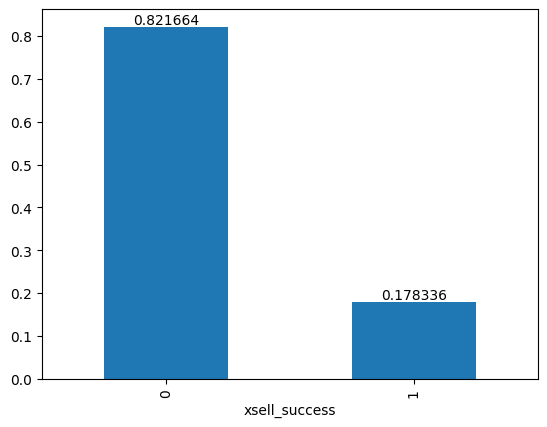

In [18]:
##Barchart for Training y Data
values = y_train.value_counts(normalize=True).plot(kind='bar')

plt.bar_label(values.containers[0]);

There are some discrepancies of target data. We will use `class_weight` to fix this later on

##Feature Data Checking

###Checking Feature Strength

In [19]:
##Merging data for EDA purposes
training = pd.concat([X_train, y_train], axis=1)
training.head()

,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,freq_month,conv_rate,promo_cont,spend_trend,xsell_success
14864,1.0,0.0,110,1,10000.0,2,10000.0,1,10000.0,16,5,72,0.018182,0.200000,0.500000,1.000000,0
6189,2.0,1.0,125,1,0.0,0,0.0,0,17000.0,61,3,71,0.000000,0.000000,0.000000,0.000000,0
2018,2.0,2.0,84,1,25000.0,3,25000.0,2,25000.0,24,7,61,0.035714,0.285714,0.666667,1.000000,0
6141,2.0,4.0,66,1,10670.0,3,11000.0,2,10000.0,16,5,36,0.045455,0.400000,0.666667,0.937207,0
8809,2.0,0.0,117,1,25000.0,2,25000.0,2,25000.0,20,6,73,0.017094,0.333333,1.000000,1.000000,0


For the sake of box plot, we will need to one hot encode all categorical columns

In [20]:
##One Hot Encoding account activity level
EDA = training.copy()
EDA.head()

EDA = pd.get_dummies(EDA, columns=["account_activity_level","customer_value_level","flag_female"], dtype=float, drop_first=False)



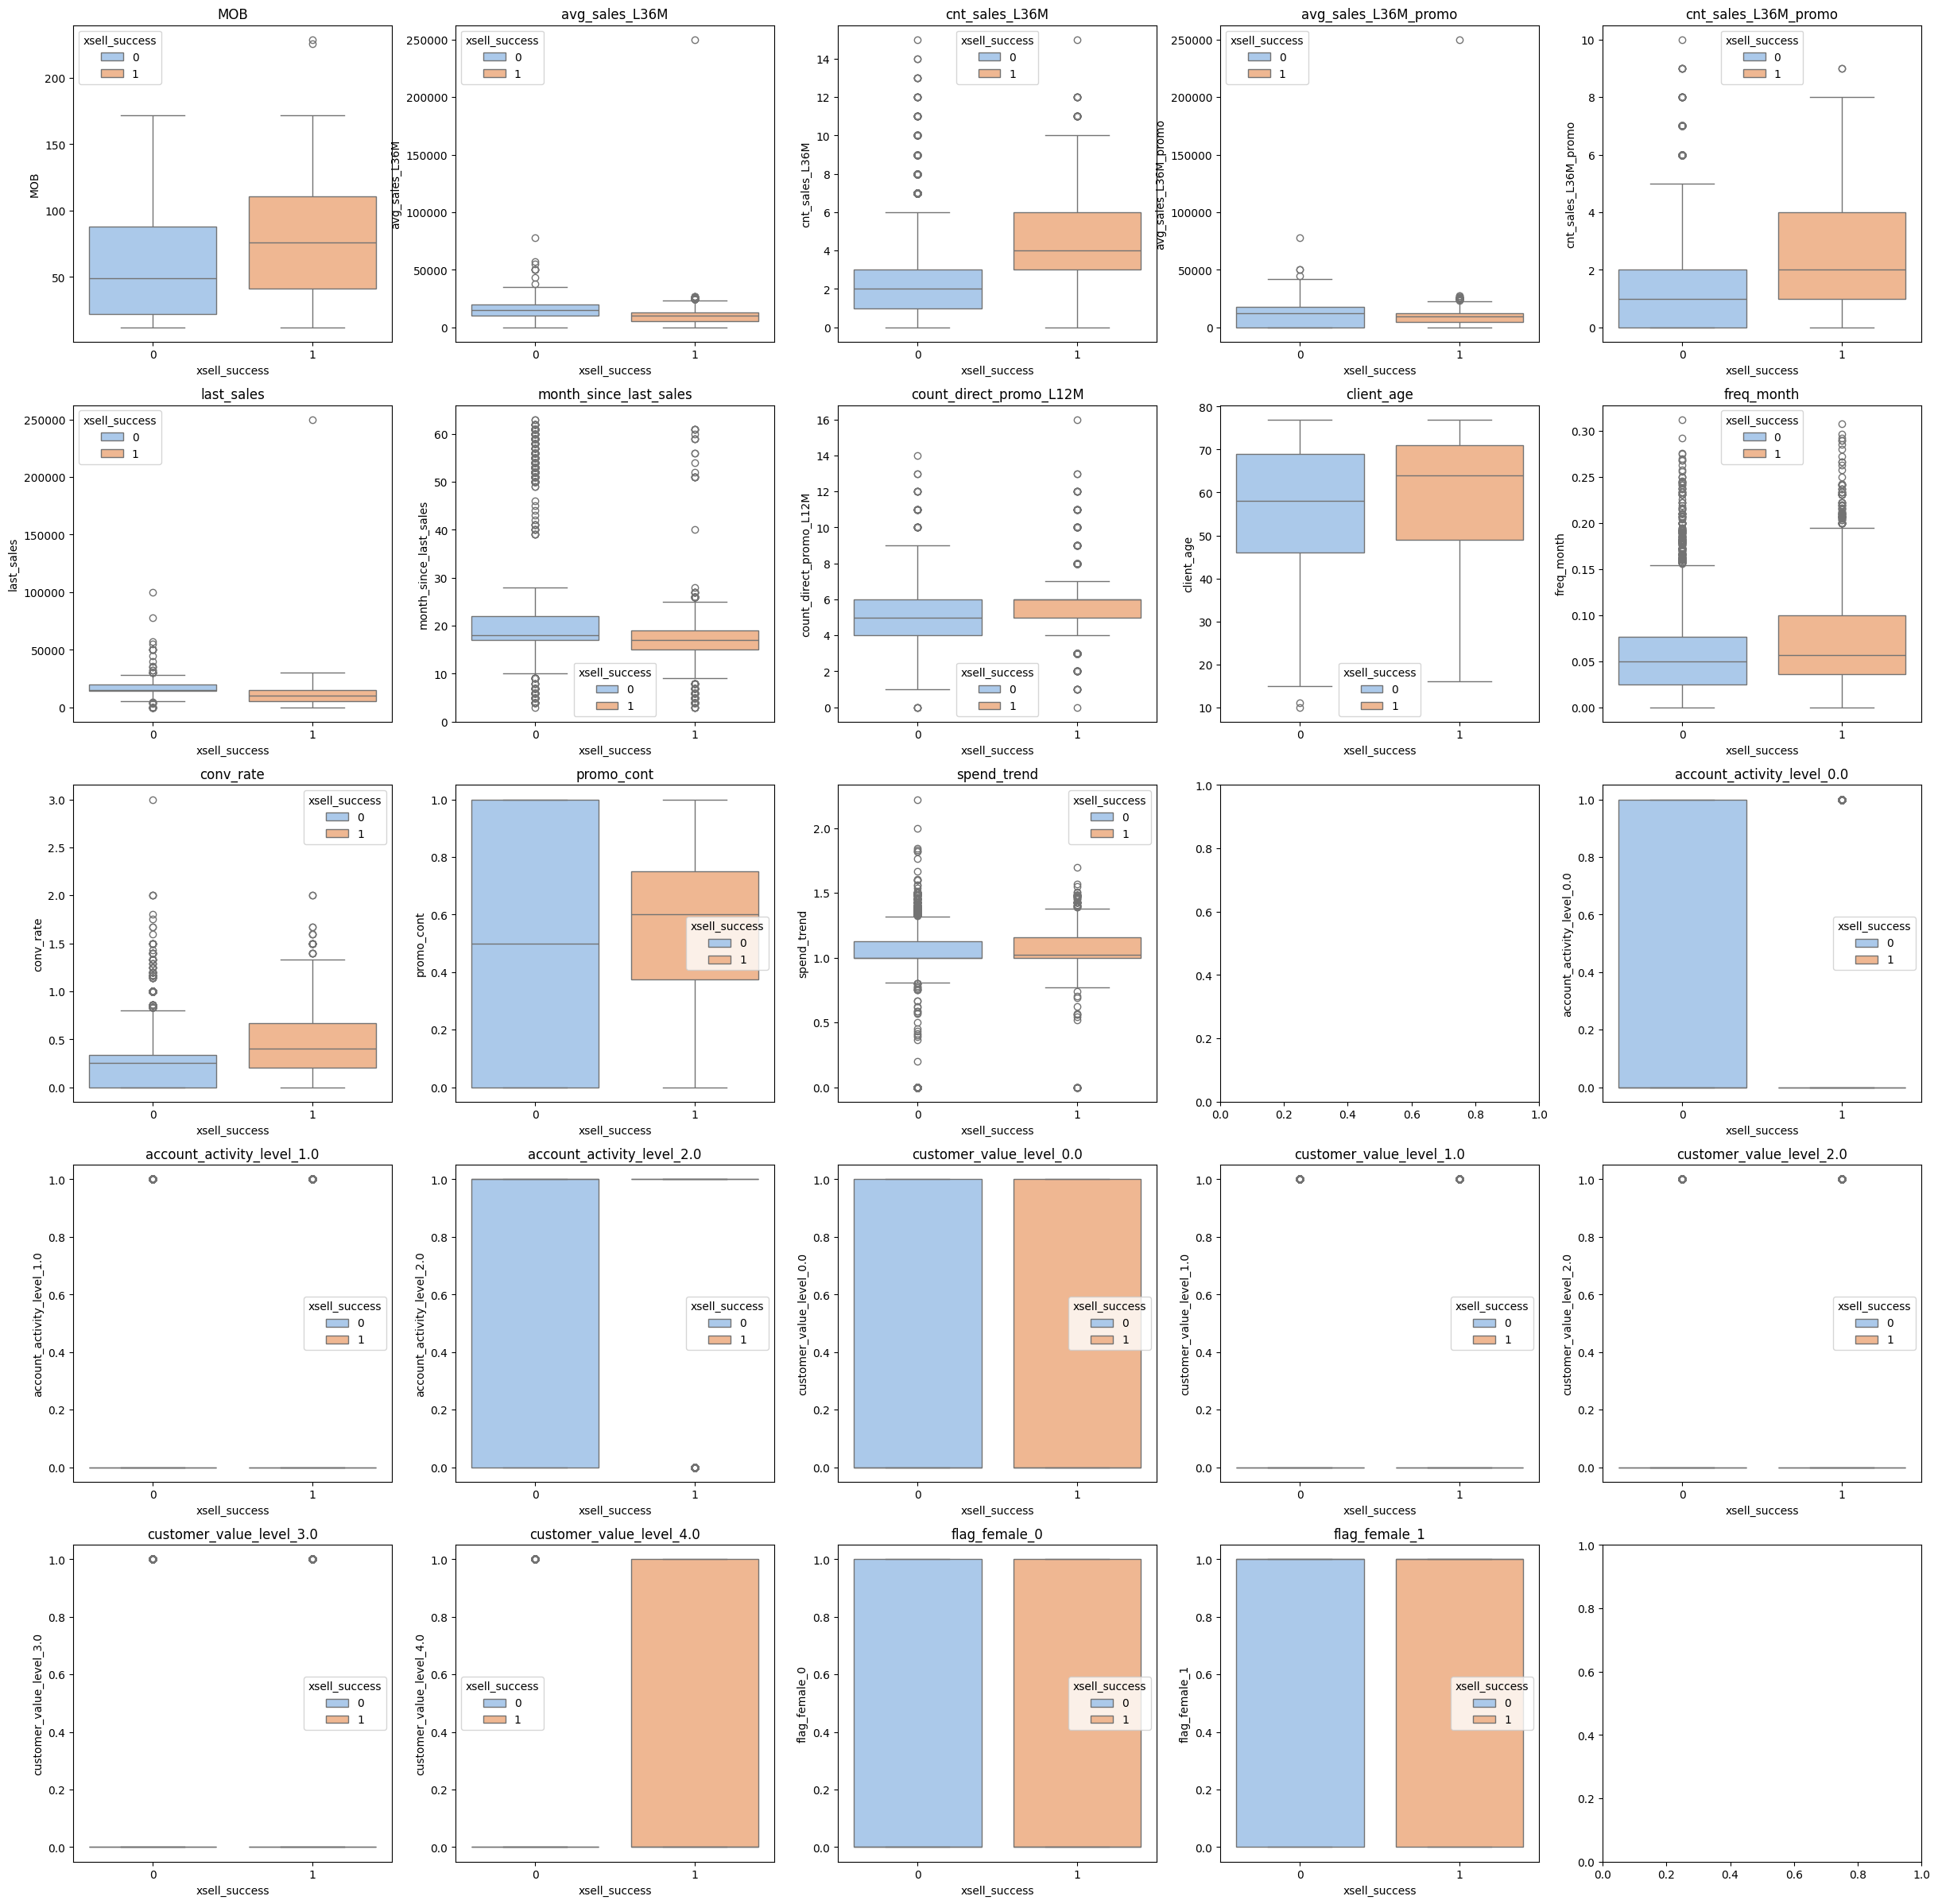

In [21]:
##Making figure and axes
fig, ax = plt.subplots(5, 5, figsize=(30,30))

##Seeing Box Plots for features
for index, col in enumerate(EDA.columns):
    if col == "xsell_success":
      continue
    else:
      ax.flatten()[index].set_title(col)
      sns.boxplot(data=EDA, x='xsell_success', y=col, hue='xsell_success', ax=ax.flatten()[index], palette="pastel")


plt.show()

With these box plots, we can analyse the metrics that may be useful in determining a probability

The analysis are as below:

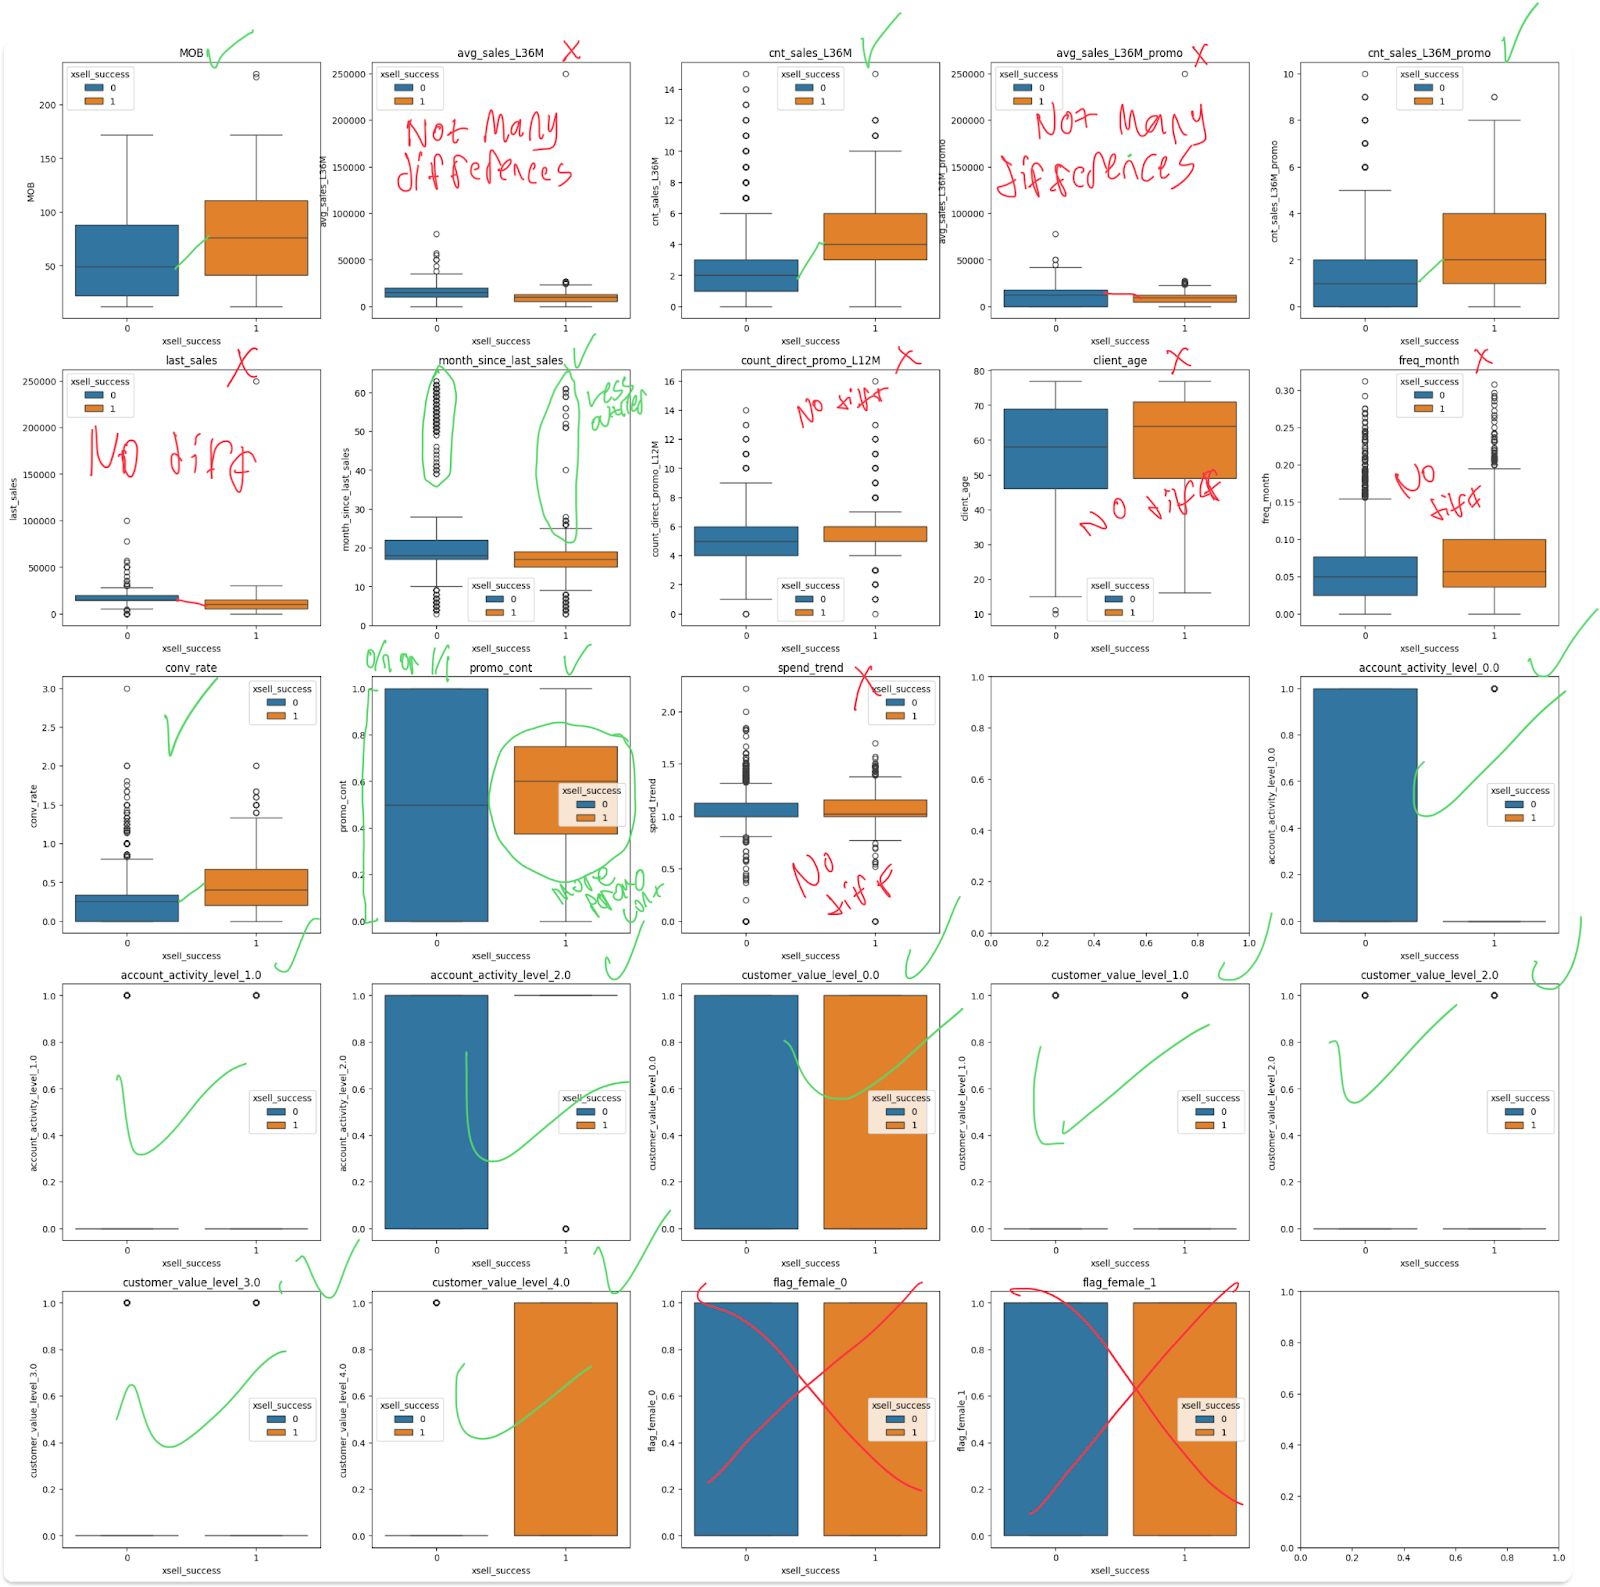

We will be dropping columns which are deemed not a strong differentiator.

The columns are:
* avg_sales_L36M
* avg_sales_L36M_promo
* last_sales
* count_direct_promo_L12M
* client_age
* freq_month
* spend_trend
* flag_female

In [22]:
#Dropping weak differentiators
X_train = X_train.drop(columns=['avg_sales_L36M',
                                  'avg_sales_L36M_promo',
                                  'last_sales',
                                  'count_direct_promo_L12M',
                                  'client_age',
                                  'freq_month',
                                  'spend_trend',
                                  'flag_female'])

X_test = X_test.drop(columns=['avg_sales_L36M',
                                  'avg_sales_L36M_promo',
                                  'last_sales',
                                  'count_direct_promo_L12M',
                                  'client_age',
                                  'freq_month',
                                  'spend_trend',
                                  'flag_female'])

X_train.head()

,account_activity_level,customer_value_level,MOB,cnt_sales_L36M,cnt_sales_L36M_promo,month_since_last_sales,conv_rate,promo_cont
14864,1.0,0.0,110,2,1,16,0.200000,0.500000
6189,2.0,1.0,125,0,0,61,0.000000,0.000000
2018,2.0,2.0,84,3,2,24,0.285714,0.666667
6141,2.0,4.0,66,3,2,16,0.400000,0.666667
8809,2.0,0.0,117,2,2,20,0.333333,1.000000


###Checking Multicolinearity

<Axes: >

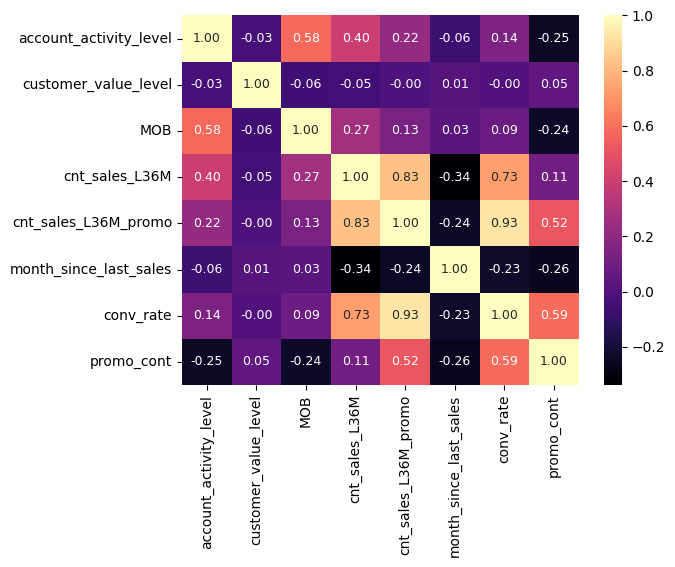

In [23]:
##Making heatmap of collinearity
sns.heatmap(X_train.corr(),
            annot=True,
            cmap='magma',
            annot_kws={"fontsize":9},
            fmt=",.2f")

In [24]:
##Doing VIF analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data.sort_values('VIF')

,feature,VIF
1,customer_value_level,2.175831
5,month_since_last_sales,3.929254
7,promo_cont,5.145205
2,MOB,5.274542
0,account_activity_level,6.781256
3,cnt_sales_L36M,13.368221
6,conv_rate,18.503099
4,cnt_sales_L36M_promo,25.389385


We will be removing cnt_sales_L36M_Promo ane cnt_sales_L36M_Promo because the data is included in promo contribution and conversion rate

<Axes: >

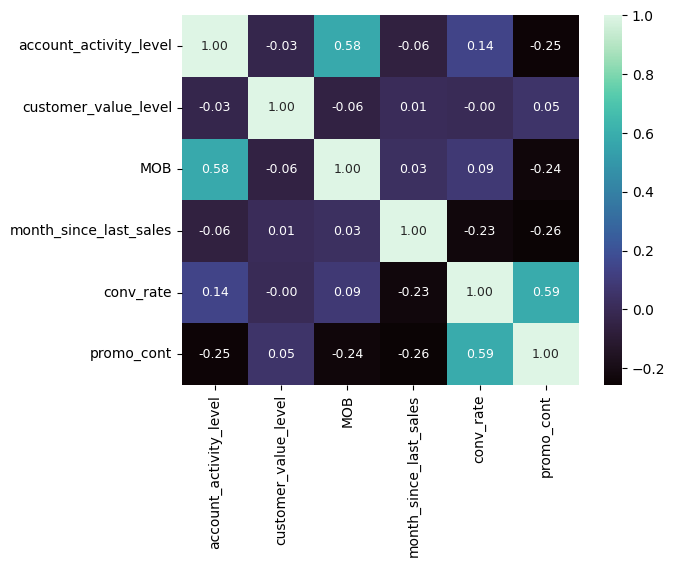

In [25]:
##Removing cnt_sales_L36M_Promo
X_train = X_train.drop(columns=['cnt_sales_L36M'])
X_train = X_train.drop(columns=['cnt_sales_L36M_promo'])

X_test = X_test.drop(columns=['cnt_sales_L36M'])
X_test = X_test.drop(columns=['cnt_sales_L36M_promo'])

##Plot heatmap
sns.heatmap(X_train.corr(),
            annot=True,
            cmap='mako',
            annot_kws={"fontsize":9},
            fmt=",.2f")

In [26]:
X_train.head()

,account_activity_level,customer_value_level,MOB,month_since_last_sales,conv_rate,promo_cont
14864,1.0,0.0,110,16,0.200000,0.500000
6189,2.0,1.0,125,61,0.000000,0.000000
2018,2.0,2.0,84,24,0.285714,0.666667
6141,2.0,4.0,66,16,0.400000,0.666667
8809,2.0,0.0,117,20,0.333333,1.000000


This will be the data that we are using for training our model

#Training Model

In [27]:
##Initializing Propensity Model

model = LogisticRegression(class_weight='balanced', max_iter=500)

##Train model

model.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', max_iter=500)

In [28]:
X_train

,account_activity_level,customer_value_level,MOB,month_since_last_sales,conv_rate,promo_cont
14864,1.0,0.0,110,16,0.200000,0.500000
6189,2.0,1.0,125,61,0.000000,0.000000
2018,2.0,2.0,84,24,0.285714,0.666667
6141,2.0,4.0,66,16,0.400000,0.666667
8809,2.0,0.0,117,20,0.333333,1.000000
...,...,...,...,...,...,...
11284,0.0,0.0,13,16,0.000000,0.000000
11964,2.0,0.0,124,19,0.428571,0.750000
5390,2.0,0.0,122,17,0.333333,0.500000
860,2.0,0.0,102,15,0.600000,0.600000


In [29]:
##Check classes
model.classes_

array([0, 1])

In [30]:
##Check probability
model.predict_proba(X_train)

array([[0.64472453, 0.35527547],
       [0.98738338, 0.01261662],
       [0.6627428 , 0.3372572 ],
       ...,
       [0.45820679, 0.54179321],
       [0.25958493, 0.74041507],
       [0.56583871, 0.43416129]])

In [31]:
##Check prediction
model.predict(X_train)

array([0, 0, 0, ..., 1, 1, 0])

In [32]:
# Copy the training set
X_train_result = X_train.copy()

# Get predicted label (use the original data: x_training_model here), put it in "prediction" column
X_train_result['prediction'] = model.predict(X_train)

# Get predicted probability of each target (classes), respectively in target = 0 (not takers) and target = 1 (takers)
X_train_result[['prob_no', 'prob_takers']] = model.predict_proba(X_train)

# See the result for probability take loan, and its predicted label
X_train_result[['prob_takers', 'prediction']]

,prob_takers,prediction
14864,0.355275,0
6189,0.012617,0
2018,0.337257,0
6141,0.732831,1
8809,0.272974,0
...,...,...
11284,0.176519,0
11964,0.483047,0
5390,0.541793,1
860,0.740415,1


#Model Evaluation

##Accuracy

In [33]:
##Model Scoring on training data
model.score(X_train,y_train)

0.7368284228769497

In [34]:
##Model Scoring on Unseen, Testing data
model.score(X_test,y_test)

0.7341823327269051

##Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

##Make confusion matrix
confusion_train = confusion_matrix(y_train, model.predict(X_train))
confusion_test = confusion_matrix(y_test, model.predict(X_test))



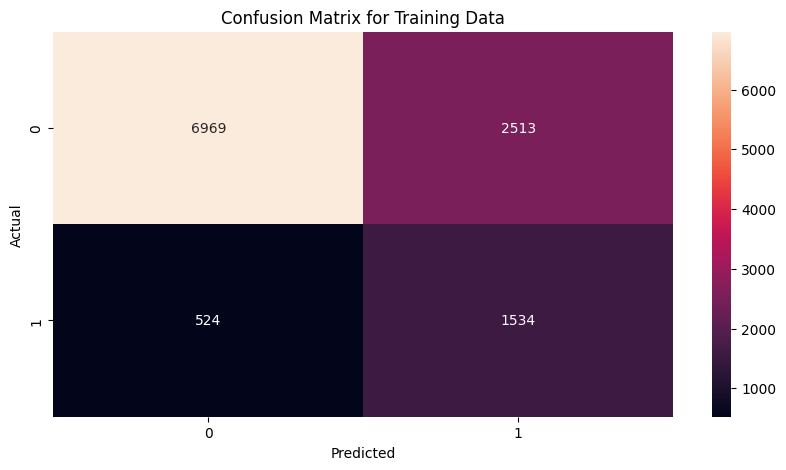

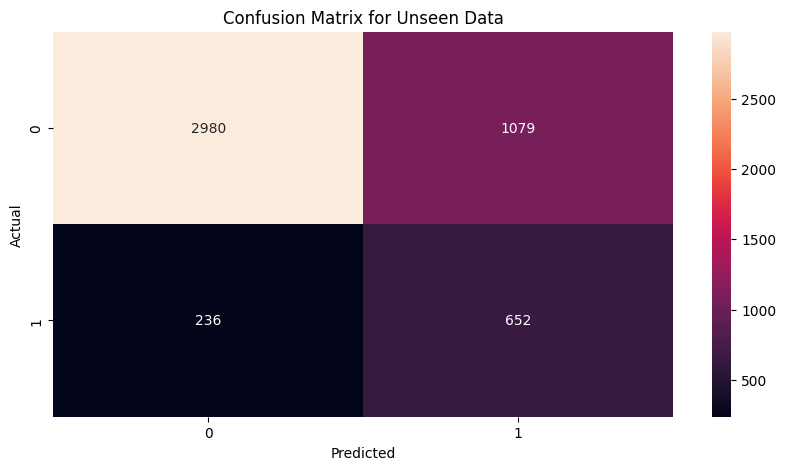

In [36]:
##Make canvas
plt.figure(figsize=(10,5))

##Make heatmap for Training data
sns.heatmap(confusion_train,annot=True,fmt='d')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Make heatmap for Unseen data
plt.figure(figsize=(10,5))
sns.heatmap(confusion_test,annot=True,fmt='d')
plt.title('Confusion Matrix for Unseen Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#

Precision Matrix

In [37]:
##Making precision matrix function

def precision(array):
  return array[1,1]/(array[0,1]+array[1,1])

print("Precision rate using train data: " + str(precision(confusion_train)))
print("Precision rate using train data: " + str(precision(confusion_test)))


Precision rate using train data: 0.3790462070669632
Precision rate using train data: 0.37666088965915656


Recall Matrix

In [38]:
##Making recall matrix function

def recall(array):
  return array[1,1]/(array[1,0]+array[1,1])

print("Recall rate using train data: " + str(recall(confusion_train)))
print("Recall rate using test data: " + str(recall(confusion_test)))

Recall rate using train data: 0.7453838678328474
Recall rate using test data: 0.7342342342342343


##Classification Report

In [39]:
##Print Classification Report of train and test
from sklearn.metrics import classification_report
print("Report using Training Data\n")
print(classification_report(y_train, model.predict(X_train)))
print("-----------------------------------------\n")
print("Report using Testing Data\n")
print(classification_report(y_test, model.predict(X_test)))


Report using Training Data

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      9482
           1       0.38      0.75      0.50      2058

    accuracy                           0.74     11540
   macro avg       0.65      0.74      0.66     11540
weighted avg       0.83      0.74      0.76     11540

-----------------------------------------

Report using Testing Data

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      4059
           1       0.38      0.73      0.50       888

    accuracy                           0.73      4947
   macro avg       0.65      0.73      0.66      4947
weighted avg       0.83      0.73      0.76      4947



##AUC-ROC Curve

In [40]:
##Make series for train and test
y_train_series = model.predict_proba(X_train)[:,1]
y_test_series = model.predict_proba(X_test)[:,1]

In [41]:
##Use ROC function
from sklearn.metrics import roc_curve, auc

##Make roc_curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_series)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_series)

##Make AUC
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

##Make gini ratio
gini_train = 2*auc_train - 1
gini_test = 2*auc_test - 1

print("AUC for Training Data: " + str(auc_train))
print("AUC for Testing Data: " + str(auc_test))
print("Gini Ratio for Training Data: " + str(gini_train))
print("Gini Ratio for Testing Data: " + str(gini_test))

AUC for Training Data: 0.8145611530537427
AUC for Testing Data: 0.7976028966882625
Gini Ratio for Training Data: 0.6291223061074853
Gini Ratio for Testing Data: 0.5952057933765249


In [42]:
##Make color code
color1 = 'lightskyblue'
color2 = 'plum'

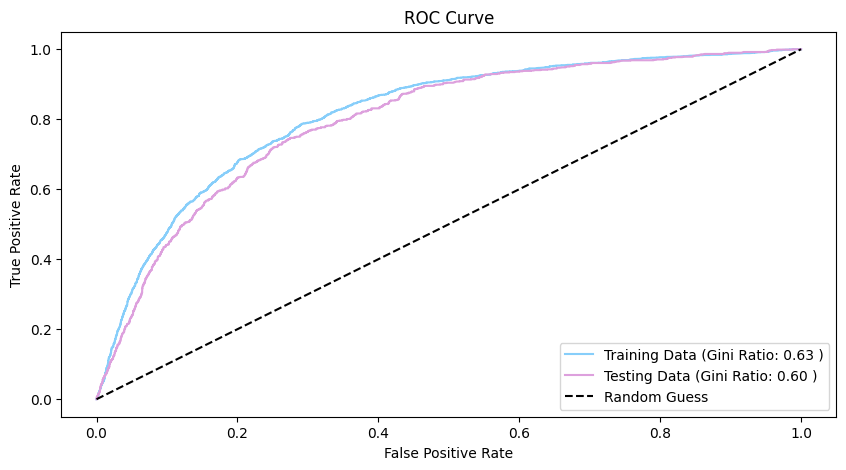

In [43]:
##Plotting both using plt with lines
plt.figure(figsize=(10,5))
plt.plot(fpr_train, tpr_train, label=f'Training Data (Gini Ratio: {gini_train:.2f} )',color=color1)
plt.plot(fpr_test, tpr_test, label=f'Testing Data (Gini Ratio: {gini_test:.2f} )',color=color2)
plt.plot([0,1],[0,1], linestyle='--', label="Random Guess",color="black")
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##Decile Performance

In [44]:
##Make decile performance table
decile_performance = X_train.copy()
decile_performance['prediction'] = model.predict(X_train)
decile_performance[['prob_no', 'prob_takers']] = model.predict_proba(X_train)
decile_performance = decile_performance[['prob_takers', 'prediction']].copy()
decile_performance['prob_takers'] = decile_performance['prob_takers'].round(5)
decile_performance = decile_performance.merge(y_train, how='inner', left_index=True, right_index=True)
decile_performance = decile_performance.rename(columns={'xsell_success':'target'})
decile_performance

,prob_takers,prediction,target
14864,0.35528,0,0
6189,0.01262,0,0
2018,0.33726,0,0
6141,0.73283,1,0
8809,0.27297,0,0
...,...,...,...
11284,0.17652,0,0
11964,0.48305,0,0
5390,0.54179,1,1
860,0.74042,1,1


In [45]:
##Classify into ranges
decile_performance['decile'] = pd.qcut(decile_performance['prob_takers'], 10, precision=5).cat.codes
decile_performance

,prob_takers,prediction,target,decile
14864,0.35528,0,0,4
6189,0.01262,0,0,0
2018,0.33726,0,0,4
6141,0.73283,1,0,8
8809,0.27297,0,0,3
...,...,...,...,...
11284,0.17652,0,0,1
11964,0.48305,0,0,6
5390,0.54179,1,1,6
860,0.74042,1,1,8


In [46]:
##Count value of each bin
df_prop = decile_performance[['target', 'decile']].value_counts().sort_index(ascending=False).reset_index()
df_prop

,target,decile,count
0,1,9,654
1,1,8,469
2,1,7,302
3,1,6,215
4,1,5,166
5,1,4,89
6,1,3,63
7,1,2,41
8,1,1,26
9,1,0,33


In [47]:
##Pivot table
df_prop = df_prop.pivot_table(index='decile', columns='target',values='count')
df_prop


target,0,1
decile,,
0,1121.0,33.0
1,1149.0,26.0
2,1092.0,41.0
3,1091.0,63.0
4,1065.0,89.0
5,988.0,166.0
6,939.0,215.0
7,852.0,302.0
8,685.0,469.0


In [48]:
##Rename columns
df_prop.columns = ['actual_non_takers', 'actual_takers']
df_prop

,actual_non_takers,actual_takers
decile,,
0,1121.0,33.0
1,1149.0,26.0
2,1092.0,41.0
3,1091.0,63.0
4,1065.0,89.0
5,988.0,166.0
6,939.0,215.0
7,852.0,302.0
8,685.0,469.0


In [49]:
##Make derived columns
#Credit kak filo for codes
# Tambah total orang tiap "binning"
df_prop['total_observed'] = df_prop['actual_non_takers'] + df_prop['actual_takers']

# Hitung probability actual takers dibandingkan semua clients
df_prop['response_rate'] = df_prop['actual_takers']/df_prop['total_observed']

# Hitung total semua orang per kategori
nontakers = df_prop['actual_non_takers'].sum()
takers = df_prop['actual_takers'].sum()

# Hitung proporsi dari actual non-taker dan taker dr total semua orang per kategori
df_prop['%non_takers'] = df_prop['actual_non_takers']/nontakers
df_prop['%takers'] = df_prop['actual_takers']/takers

# Buat cumulative pct dari masing-masing kategori
df_prop['cumm%_non_takers'] = df_prop['%non_takers'].cumsum()
df_prop['cumm%_takers'] = df_prop['%takers'].cumsum()

# Q: Apakah benar ketika peluang ambil loan itu semakin tinggi, memang semakin banyak orang yang ambil loan?
df_prop

,actual_non_takers,actual_takers,total_observed,response_rate,%non_takers,%takers,cumm%_non_takers,cumm%_takers
decile,,,,,,,,
0,1121.0,33.0,1154.0,0.028596,0.118224,0.016035,0.118224,0.016035
1,1149.0,26.0,1175.0,0.022128,0.121177,0.012634,0.239401,0.028669
2,1092.0,41.0,1133.0,0.036187,0.115166,0.019922,0.354567,0.048591
3,1091.0,63.0,1154.0,0.054593,0.115060,0.030612,0.469627,0.079203
4,1065.0,89.0,1154.0,0.077123,0.112318,0.043246,0.581945,0.122449
5,988.0,166.0,1154.0,0.143847,0.104197,0.080661,0.686142,0.203110
6,939.0,215.0,1154.0,0.186308,0.099030,0.104470,0.785172,0.307580
7,852.0,302.0,1154.0,0.261698,0.089854,0.146744,0.875026,0.454325
8,685.0,469.0,1154.0,0.406412,0.072242,0.227891,0.947269,0.682216


In [50]:
##Calculate KS Statistics
df_prop['ks'] = abs(df_prop['cumm%_non_takers'] - df_prop['cumm%_takers'])

print("The KS Statistic is: " + str(round(df_prop["ks"].max()*100,2))+"\n")
df_prop["ks"]

The KS Statistic is: 48.3



,ks
decile,
0,0.102189
1,0.210732
2,0.305976
3,0.390424
4,0.459496
5,0.483032
6,0.477592
7,0.420702
8,0.265053


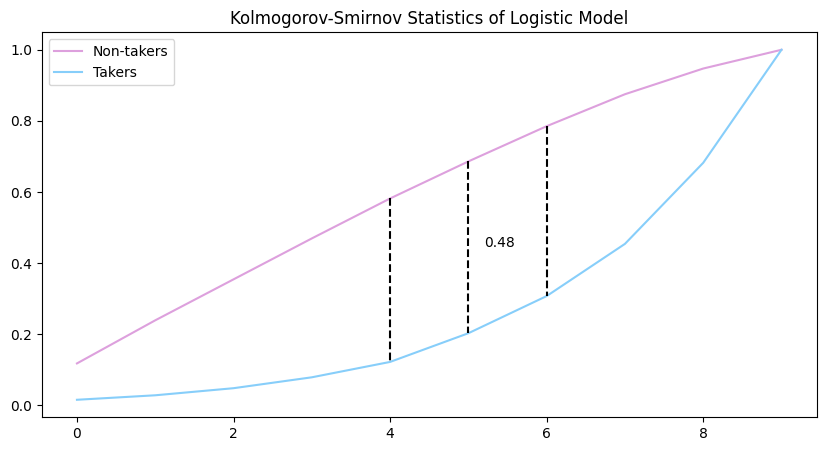

In [51]:
##Make chart
plt.figure(figsize=(10,5))
plt.plot(df_prop['cumm%_non_takers'], label='Non-takers',color=color2)
plt.plot(df_prop['cumm%_takers'], label='Takers',color=color1)


##Make list of line for the top 3 segments with largest ks stat
x_cor = [4,5,6]
y_cor_1 = [df_prop['cumm%_non_takers'][4],df_prop['cumm%_non_takers'][5],df_prop['cumm%_non_takers'][6]]
y_cor_2 = [df_prop['cumm%_takers'][4],df_prop['cumm%_takers'][5],df_prop['cumm%_takers'][6]]

##Make function to make small df of coordinates and plot line
for Index, i in enumerate(x_cor):
    cor1 = pd.DataFrame({
        "x" : [x_cor[Index],x_cor[Index]],
        "y" : [y_cor_1[Index],y_cor_2[Index]]
    })
    plt.plot(cor1["x"], cor1["y"], color='black', linestyle='--')
    if Index == 1:
      plt.annotate(
    round(df_prop['ks'].loc[5],2),  # The text of the label
    xy=(x_cor[Index], (y_cor_1[Index]+ y_cor_2[Index])/2), # The position of the annotated point
    xytext=(x_cor[Index]+0.2, (y_cor_1[Index]+ y_cor_2[Index])/2),  # The position of the label text
      )

plt.title ("Kolmogorov-Smirnov Statistics of Logistic Model")
plt.legend()
##Plot lines from cors

plt.show()

#Optimising Model

In order to optimise the model, we will need to go back to the business problem

We know that declined call (False positives) cost more than dropped calls which mean we should do increase the precision to decrease False Positives

In [52]:
##Try Optimizing Model by Modifying Cutoff to Increase Precision
model_optimal = LogisticRegression(class_weight='balanced', max_iter=500, C=0.7)
model_optimal.fit(X_train,y_train)

##Classification Report
print("-----------------------------------------\n")
print("Report using Testing Data\n")
print(classification_report(y_test, model_optimal.predict(X_test)))


-----------------------------------------

Report using Testing Data

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      4059
           1       0.38      0.74      0.50       888

    accuracy                           0.73      4947
   macro avg       0.65      0.73      0.66      4947
weighted avg       0.83      0.73      0.76      4947



Seems like this is already the most optimal model for precision.

With this, we can conclude the model with 83% Precision and 73% Recall

Improvements:

More Success data

#Applying Model

In the context of the business problem, we are trying to find the average probability of a user accepting for the data provided

This would mean we can do use the precision rate for positive which is TP/TP+FP

In [53]:
##Precision rate
new_user_rate = precision(confusion_test)

##Benefit Cost Analysis

```
- For outbound sales call, the average contact rate is 15% (that is, only 15% of calls picked up by the customers)"
- Average cost of call is 2.75 euros/call for picked-up calls, 1.15 euros for dropped calls"
- Average new user sales is 10338 euros
- Assume revenue generated is 2.4% of total sales
```

With 1000 callers which was already flagged as potential new users, only 15% will pick up the call

The R/E ratio that was gathered through the pilot was 1.04


In [54]:
##Cost
cost_connect = 2.75
cost_drop = 1.15
revenue = 0.024
avg_sales = 10388

In [55]:
##Find Connected users
call_connect = 1000*0.15
call_connect

150.0

In [56]:
#Find dropped calls
drop_call = 1000 - call_connect
drop_call

850.0

Among those 150 users, using precision matrix, only 38% will actually become new users, the rest will decline

In [57]:
##Find out New user and Wasted User
new_user = round(call_connect * new_user_rate)
wasted_user = call_connect - new_user

In [58]:
##Summary
print("Total Number of Customers: " + str(1000))
print("Contact Rate: " + str(0.15))
print("Welcome Bonus (in euro): " + str(100))
print("Cost of Connected Call: " + str(cost_connect))
print("Cost of Dropped Calls: " + str(cost_drop))
print("Revenue Margin: " + str(revenue))
print("Average Sales per Active Customer: " + str(avg_sales))
print("Probability of New User: " + str(new_user_rate))
print("-------------------------------")
print("Number of Connected Customers: " + str(call_connect))
print("Number of Dropped Customers: " + str(drop_call))
print("Number of New Customers: " + str(new_user))
print("-------------------------------")
print("Expected New Customers: " + str(new_user))
print("Expected Sales: " + str(new_user * avg_sales))
print("Expected Revenue: " + str(new_user * avg_sales * revenue))
print("-------------------------------")
print("Cost of Dropped Calls: " + str(drop_call * cost_drop))
print("Cost of Dropped Calls: " + str(call_connect * cost_connect))
print("Cost of Welcome Bonus: " + str(100 * new_user))
print("Total Cost: " + str(drop_call * cost_drop + call_connect * cost_connect + 100 * new_user))
print("-------------------------------")
print("R/E ratio: " + str(round((new_user * avg_sales * revenue)/
                      (drop_call * cost_drop + call_connect * cost_connect + 100 * new_user),3)))

Total Number of Customers: 1000
Contact Rate: 0.15
Welcome Bonus (in euro): 100
Cost of Connected Call: 2.75
Cost of Dropped Calls: 1.15
Revenue Margin: 0.024
Average Sales per Active Customer: 10388
Probability of New User: 0.37666088965915656
-------------------------------
Number of Connected Customers: 150.0
Number of Dropped Customers: 850.0
Number of New Customers: 56
-------------------------------
Expected New Customers: 56
Expected Sales: 581728
Expected Revenue: 13961.472
-------------------------------
Cost of Dropped Calls: 977.4999999999999
Cost of Dropped Calls: 412.5
Cost of Welcome Bonus: 5600
Total Cost: 6990.0
-------------------------------
R/E ratio: 1.997


In [59]:
##Ratio Change in Percent
(1.99 - 1.04)/1.04

0.9134615384615384

The end result of R/E ratio 1.99 shows that our model is expected to increase the R/E Ratio by 0.96, an increase of up to 91%

#Using Simple Pytorch Neural Network

In [63]:
##Import pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [64]:
##Make train and test in tensor
X_train_tensor = torch.FloatTensor(X_train.values)
X_test_tensor = torch.FloatTensor(X_test.values)
y_train_tensor = torch.LongTensor(y_train.values)
y_test_tensor = torch.LongTensor(y_test.values)

In [106]:
##Initialize model

class Model(nn.Module):
  def __init__(self, in_features=6, h1=8,h2=9,h3=6,out=2):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.out = nn.Linear(h3,out)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)
    return x

In [157]:
##Initialize seed
torch.manual_seed(42)

##init model
model = Model()

In [168]:
##Set criterion for evaluation
criterion = nn.CrossEntropyLoss()

##Set ADAM optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

##Determine epoch
epochs = 500

##Train Model

In [169]:
##List for error
error = []

for i in range(epochs):
  y_pred = model.forward(X_train_tensor)
  loss = criterion(y_pred, y_train_tensor)
  error.append(loss.detach().numpy())

  if i%50 == 0:
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0  loss: 0.36678669
epoch: 50  loss: 0.36661565
epoch: 100  loss: 0.36652803
epoch: 150  loss: 0.36649138
epoch: 200  loss: 0.36647737
epoch: 250  loss: 0.36647305
epoch: 300  loss: 0.36647150
epoch: 350  loss: 0.36647081
epoch: 400  loss: 0.36647022
epoch: 450  loss: 0.36646962


Text(0, 0.5, 'Error')

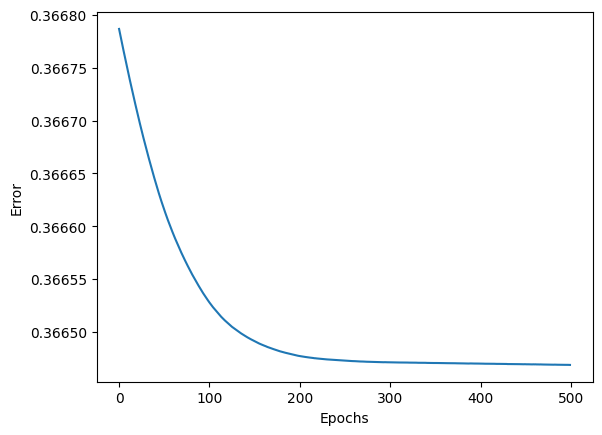

In [170]:
##Graph losses
plt.plot(range(epochs), error)
plt.xlabel('Epochs')
plt.ylabel('Error')

##Evaluate Model

In [171]:
##Evaluate model
with torch.no_grad():
  y_eval = model.forward(X_test_tensor)
  loss = criterion(y_eval, y_test_tensor)

print(loss)

tensor(0.3802)


In [288]:
##See correctness and Accuracy
correct = 0
total = len(y_test_tensor)
with torch.no_grad():
  for i, data in enumerate(X_test_tensor):
    y_val = model.forward(data)
    if y_val.argmax().item() != y_test_tensor[i]:
          print(f'Iteration: {i+1:2}. {str(y_val):38}  {y_test_tensor[i]}  {y_val.argmax().item()}')

    else:
      correct += 1

print(f'\n{correct} out of {total} = {100*correct/total:.2f}% correct')


Iteration:  5. tensor([0.1364, 0.2183])                0  1
Iteration: 22. tensor([ 0.7641, -0.6931])              1  0
Iteration: 25. tensor([ 0.7089, -0.6131])              1  0
Iteration: 28. tensor([0.0482, 0.3463])                0  1
Iteration: 42. tensor([0.2043, 0.1197])                1  0
Iteration: 43. tensor([ 0.6015, -0.4571])              1  0
Iteration: 47. tensor([0.0401, 0.3581])                0  1
Iteration: 49. tensor([0.2005, 0.1252])                1  0
Iteration: 53. tensor([ 0.4085, -0.1769])              1  0
Iteration: 55. tensor([ 0.5417, -0.3702])              1  0
Iteration: 59. tensor([ 1.2609, -1.4145])              1  0
Iteration: 66. tensor([0.1684, 0.1718])                0  1
Iteration: 71. tensor([ 0.3710, -0.1224])              1  0
Iteration: 77. tensor([ 0.6012, -0.4567])              1  0
Iteration: 84. tensor([ 0.5351, -0.3606])              1  0
Iteration: 85. tensor([ 0.4679, -0.2630])              1  0
Iteration: 89. tensor([ 0.7632, -0.6918]

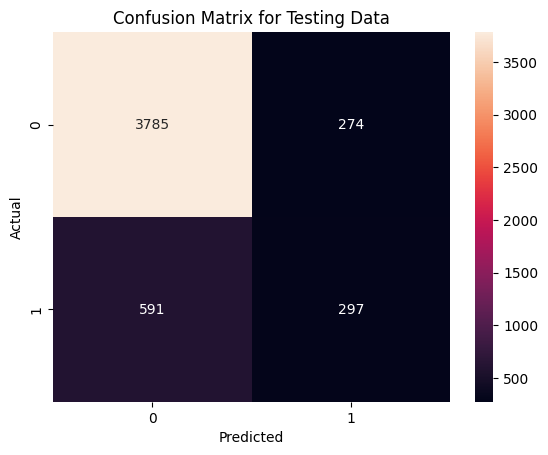

In [292]:
##Make Confusion Matrix
confusion_test3 = confusion_matrix(y_test_tensor, model.forward(X_test_tensor).argmax(dim=1))

##Show Confusion Matrix
sns.heatmap(confusion_test3,annot=True,fmt='d')
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [301]:
print(precision(confusion_test3))
print(recall(confusion_test3))

0.5201401050788091
0.3344594594594595


###Classification Report

In [178]:
##Generate classification report
print(classification_report(y_test, model.forward(X_test_tensor).argmax(dim=1)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4059
           1       0.52      0.33      0.41       888

    accuracy                           0.83      4947
   macro avg       0.69      0.63      0.65      4947
weighted avg       0.80      0.83      0.81      4947



##Benefit Cost Analysis - Improved

In [183]:
##Change variables
NN_Rate = 0.52 #Precision Rate
NN_User = 150*0.52

##Summary
print("Total Number of Customers: " + str(1000))
print("Contact Rate: " + str(0.15))
print("Welcome Bonus (in euro): " + str(100))
print("Cost of Connected Call: " + str(cost_connect))
print("Cost of Dropped Calls: " + str(cost_drop))
print("Revenue Margin: " + str(revenue))
print("Average Sales per Active Customer: " + str(avg_sales))
print("Probability of New User: " + str(NN_Rate))
print("-------------------------------")
print("Number of Connected Customers: " + str(call_connect))
print("Number of Dropped Customers: " + str(drop_call))
print("Number of New Customers: " + str(NN_User))
print("-------------------------------")
print("Expected New Customers: " + str(NN_User))
print("Expected Sales: " + str(NN_User * avg_sales))
print("Expected Revenue: " + str(NN_User * avg_sales * revenue))
print("-------------------------------")
print("Cost of Dropped Calls: " + str(drop_call * cost_drop))
print("Cost of Dropped Calls: " + str(call_connect * cost_connect))
print("Cost of Welcome Bonus: " + str(100 * NN_User))
print("Total Cost: " + str(drop_call * cost_drop + call_connect * cost_connect + 100 * NN_User))
print("-------------------------------")
print("R/E ratio: " + str(round((NN_User * avg_sales * revenue)/
                      (drop_call * cost_drop + call_connect * cost_connect + 100 * NN_User),3)))

Total Number of Customers: 1000
Contact Rate: 0.15
Welcome Bonus (in euro): 100
Cost of Connected Call: 2.75
Cost of Dropped Calls: 1.15
Revenue Margin: 0.024
Average Sales per Active Customer: 10388
Probability of New User: 0.52
-------------------------------
Number of Connected Customers: 150.0
Number of Dropped Customers: 850.0
Number of New Customers: 78.0
-------------------------------
Expected New Customers: 78.0
Expected Sales: 810264.0
Expected Revenue: 19446.336
-------------------------------
Cost of Dropped Calls: 977.4999999999999
Cost of Dropped Calls: 412.5
Cost of Welcome Bonus: 7800.0
Total Cost: 9190.0
-------------------------------
R/E ratio: 2.116


##Optimize Model with More Features?

###Prepare Data

In [255]:
##Get Whole Data
X_Tensor = merged_edit.copy()
X_Tensor

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,xsell_success,xsell_sales,xsell_count,freq_month,conv_rate,promo_cont,spend_trend
0,100000006,2.0,4.0,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0,0.0,0.0,0.011364,0.000000,0.00,1.000000
1,100000038,2.0,4.0,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,1,10000.0,2.0,0.075758,0.200000,0.40,1.111111
2,100000382,2.0,4.0,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0,0.0,0.0,0.050000,0.500000,0.50,1.154068
3,100000453,2.0,4.0,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0,0.0,0.0,0.047059,0.500000,0.75,1.071429
4,100000472,2.0,4.0,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0,0.0,0.0,0.008547,0.200000,1.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16482,101059900,0.0,0.0,18,1,15000.0,1,15000.0,1,15000.0,21,3,53,0,0.0,0.0,0.055556,0.333333,1.00,1.000000
16483,101059915,0.0,0.0,16,0,20000.0,1,0.0,0,20000.0,19,4,71,0,0.0,0.0,0.062500,0.000000,0.00,1.000000
16484,101059935,0.0,0.0,18,0,20000.0,1,20000.0,1,20000.0,21,4,42,0,0.0,0.0,0.055556,0.250000,1.00,1.000000
16485,101059941,0.0,0.0,14,0,20000.0,2,20000.0,2,20000.0,17,6,48,0,0.0,0.0,0.142857,0.333333,1.00,1.000000


In [256]:
##Make Y Data
y_Tensor = merged_edit['xsell_success']
y_Tensor

,xsell_success
0,0
1,1
2,0
3,0
4,0
...,...
16482,0
16483,0
16484,0
16485,0


In [257]:
##Remove Xsells from X_Tensor
X_Tensor = X_Tensor.drop(columns=['xsell_success','xsell_sales','xsell_count'])
X_Tensor

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,freq_month,conv_rate,promo_cont,spend_trend
0,100000006,2.0,4.0,88,0,25000.0,1,0.0,0,25000.0,26,5,27,0.011364,0.000000,0.00,1.000000
1,100000038,2.0,4.0,66,0,9000.0,5,10000.0,2,10000.0,25,10,52,0.075758,0.200000,0.40,1.111111
2,100000382,2.0,4.0,120,1,17330.0,6,16000.0,3,20000.0,18,6,70,0.050000,0.500000,0.50,1.154068
3,100000453,2.0,4.0,85,1,14000.0,4,14670.0,3,15000.0,24,6,67,0.047059,0.500000,0.75,1.071429
4,100000472,2.0,4.0,117,0,12500.0,1,12500.0,1,12500.0,23,5,50,0.008547,0.200000,1.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16482,101059900,0.0,0.0,18,1,15000.0,1,15000.0,1,15000.0,21,3,53,0.055556,0.333333,1.00,1.000000
16483,101059915,0.0,0.0,16,0,20000.0,1,0.0,0,20000.0,19,4,71,0.062500,0.000000,0.00,1.000000
16484,101059935,0.0,0.0,18,0,20000.0,1,20000.0,1,20000.0,21,4,42,0.055556,0.250000,1.00,1.000000
16485,101059941,0.0,0.0,14,0,20000.0,2,20000.0,2,20000.0,17,6,48,0.142857,0.333333,1.00,1.000000


In [258]:
##Removing Unnecessary features using previous EDA
X_Tensor = X_Tensor.drop(columns=['avg_sales_L36M',
                                  'avg_sales_L36M_promo',
                                  'last_sales',
                                  'count_direct_promo_L12M',
                                  'cnt_sales_L36M_promo',
                                  'cnt_sales_L36M',
                                  'spend_trend'])

In [259]:
X_Tensor

,account_id,account_activity_level,customer_value_level,MOB,flag_female,month_since_last_sales,client_age,freq_month,conv_rate,promo_cont
0,100000006,2.0,4.0,88,0,26,27,0.011364,0.000000,0.00
1,100000038,2.0,4.0,66,0,25,52,0.075758,0.200000,0.40
2,100000382,2.0,4.0,120,1,18,70,0.050000,0.500000,0.50
3,100000453,2.0,4.0,85,1,24,67,0.047059,0.500000,0.75
4,100000472,2.0,4.0,117,0,23,50,0.008547,0.200000,1.00
...,...,...,...,...,...,...,...,...,...,...
16482,101059900,0.0,0.0,18,1,21,53,0.055556,0.333333,1.00
16483,101059915,0.0,0.0,16,0,19,71,0.062500,0.000000,0.00
16484,101059935,0.0,0.0,18,0,21,42,0.055556,0.250000,1.00
16485,101059941,0.0,0.0,14,0,17,48,0.142857,0.333333,1.00


<Axes: >

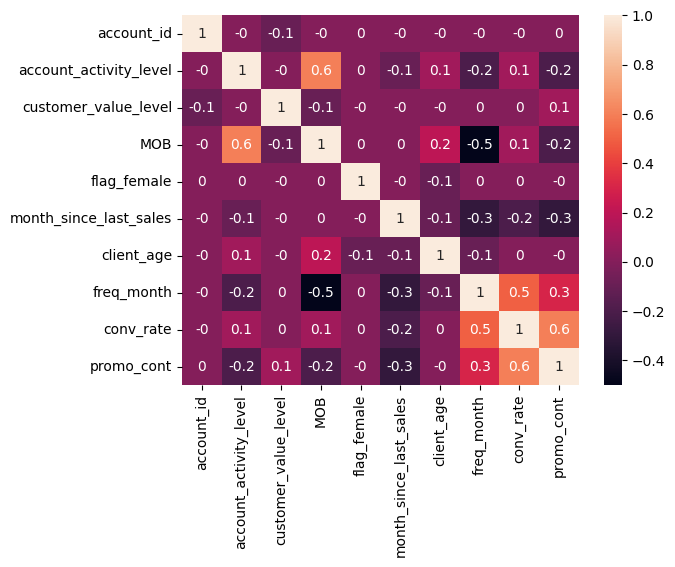

In [260]:
##Check multicol using sns heatmap
sns.heatmap(round(X_Tensor.corr(),1), annot=True)

In [261]:
##Check using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data2 = pd.DataFrame()
vif_data2["feature"] = X_Tensor.drop(columns=['account_id']).columns
vif_data2["VIF"] = [variance_inflation_factor(X_Tensor.drop(columns=['account_id']).values, i) for i in range(len(X_Tensor.drop(columns=['account_id']).columns))]
vif_data2.sort_values('VIF',ascending=False)

,feature,VIF
5,client_age,13.213570
2,MOB,8.858372
0,account_activity_level,6.525355
7,conv_rate,5.807064
6,freq_month,5.429039
8,promo_cont,5.248130
4,month_since_last_sales,5.196312
1,customer_value_level,2.198111
3,flag_female,2.135263


In [262]:
X_Tensor.info()
X_Tensor = X_Tensor.drop(columns=['account_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_id              16487 non-null  object 
 1   account_activity_level  16487 non-null  float64
 2   customer_value_level    16487 non-null  float64
 3   MOB                     16487 non-null  int64  
 4   flag_female             16487 non-null  int64  
 5   month_since_last_sales  16487 non-null  int64  
 6   client_age              16487 non-null  int64  
 7   freq_month              16487 non-null  float64
 8   conv_rate               16487 non-null  float64
 9   promo_cont              16487 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 1.3+ MB


In [263]:
##Split X and Y data
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X_Tensor, y_Tensor, test_size=0.2, random_state=42)

##Make into Tensor Floats and Longs
X_train_T = torch.FloatTensor(X_train_T.values)
X_test_T = torch.FloatTensor(X_test_T.values)
y_train_T = torch.LongTensor(y_train_T.values)
y_test_T = torch.LongTensor(y_test_T.values)

###Make Simple NN Model

In [264]:
##Make new NN model
class Model_2(nn.Module):
  def __init__(self, in_features=9, h1=8,h2=9,h3=6,out=2):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.out = nn.Linear(h3,out)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)
    return x

In [280]:
##Initiate model

model2 = Model_2()

In [281]:
##Set ADAM optimizer
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)

##Determine epoch
epoch2 = 500

###Train Model

In [282]:
##Train Model
error2 = []

for i in range(epoch2):
  y_pred = model2.forward(X_train_T)
  loss = criterion(y_pred, y_train_T)
  error2.append(loss.detach().numpy())

  if i%50 == 0:
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0  loss: 1.05037951
epoch: 50  loss: 0.41641727
epoch: 100  loss: 0.39680824
epoch: 150  loss: 0.38740170
epoch: 200  loss: 0.38029772
epoch: 250  loss: 0.37919861
epoch: 300  loss: 0.37573928
epoch: 350  loss: 0.37341651
epoch: 400  loss: 0.37176526
epoch: 450  loss: 0.37082091


Text(0, 0.5, 'Error')

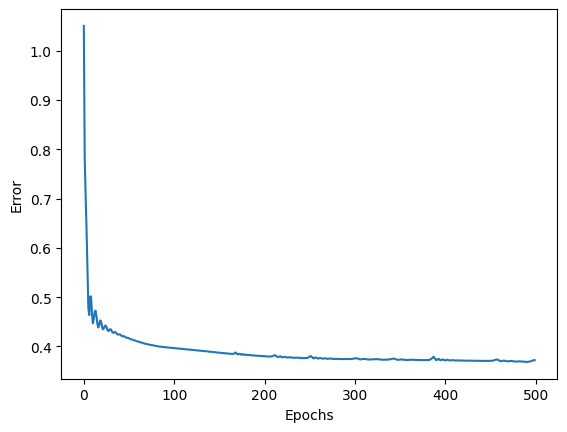

In [283]:
##Graph losses
plt.plot(range(epoch2), error2)
plt.xlabel('Epochs')
plt.ylabel('Error')

###Evaluate Model

In [286]:
##See correctness and accuracy
correct = 0
total = len(y_test_T)
with torch.no_grad():
  for i, data in enumerate(X_test_T):
    y_val = model2.forward(data)
    if y_val.argmax().item() != y_test_T[i]:
          print(f'Iteration: {i+1:2}. {str(y_val):38}  {y_test_T[i]}  {y_val.argmax().item()}')

    else:
      correct += 1

print(f'\n{correct} out of {total} = {100*correct/total:.2f}% correct')

Iteration: 22. tensor([ 1.1596, -0.4673])              1  0
Iteration: 25. tensor([ 1.1163, -0.4119])              1  0
Iteration: 28. tensor([0.3024, 0.5252])                0  1
Iteration: 42. tensor([ 0.8641, -0.0161])              1  0
Iteration: 43. tensor([ 1.1905, -0.3213])              1  0
Iteration: 47. tensor([0.2625, 0.8006])                0  1
Iteration: 49. tensor([0.7183, 0.1305])                1  0
Iteration: 53. tensor([ 1.0073, -0.0542])              1  0
Iteration: 55. tensor([ 0.9867, -0.1924])              1  0
Iteration: 59. tensor([ 1.5371, -0.8504])              1  0
Iteration: 71. tensor([1.0468, 0.0032])                1  0
Iteration: 77. tensor([ 1.2244, -0.2194])              1  0
Iteration: 84. tensor([ 0.9583, -0.0751])              1  0
Iteration: 85. tensor([ 0.8428, -0.1462])              1  0
Iteration: 87. tensor([0.4310, 0.3058])                1  0
Iteration: 89. tensor([ 1.4481, -0.3300])              1  0
Iteration: 93. tensor([0.9326, 0.1645]) 

In [287]:
##Make clasification report
print(classification_report(y_test_T, model2.forward(X_test_T).argmax(dim=1)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2714
           1       0.57      0.21      0.31       584

    accuracy                           0.83      3298
   macro avg       0.71      0.59      0.61      3298
weighted avg       0.80      0.83      0.80      3298



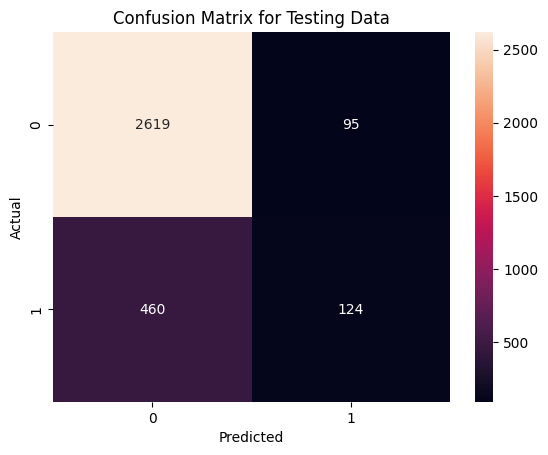

In [290]:
##Make Confusion Matrix
confusion_test2 = confusion_matrix(y_test_T, model2.forward(X_test_T).argmax(dim=1))

##Show Confusion Matrix
sns.heatmap(confusion_test2,annot=True,fmt='d')
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###Conclusion

No, adding more features without supervision doesn't do much in terms of adding more scores. However, it shifts the recall and precision scores.

#End of Exploration

With this project, I gained the knowledge of:
-Data Preparation including Multicollinearity and Feature Engineering

-Logistic Regression Model Training as well as evaluating model

-Applying Model in real-life uses

-Create simple Feed Forward Neural Network

-Evaluate The model

-Explore the effects of more features to Neural Network



---

It's been a really fun learning experience and I can't wait to explore more on NN and ML

